# Data Cleaning - NYC AirBNB

## Project Overview
This project is about cleaning the NYC Airbnb dataset to make it ready for analysis. The raw data had issues like missing values, duplicates, and inconsistent formats. Through proper cleaning steps, the dataset was made accurate and reliable for further use.

# Import Libraries

In [53]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for not throwing any kind of warning
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset & Explore Initial Information

In [54]:
# load the dataset
df = pd.read_csv(r'AB_NYC_2019.csv')

In [55]:
# show all the columns name 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [56]:
# check shape of the dataframe 
df.shape

(48895, 16)

In [57]:
print('No. of Rows in the Dataset:-', df.shape[0])
print('No. of Columns in the Dataset:-', df.shape[1])

No. of Rows in the Dataset:- 48895
No. of Columns in the Dataset:- 16


In [58]:
# first 5 rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [59]:
# last 5 rows of the dataset 
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [60]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [61]:
# statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [62]:
# check how many unique values each columns have
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [63]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Data Cleaning & Preprocessing

In [64]:
# check duplicates
df.duplicated().sum()

np.int64(0)

#### Handling Missing Values in name & host_name

In [65]:
print("Before Dopping:")
df[['name', 'host_name']].isnull().sum()

Before Dopping:


name         16
host_name    21
dtype: int64

In [66]:
# drop rows where 'name' or 'host_name' is missing
df.dropna(subset=['name', 'host_name'], inplace=True)

In [67]:
print("After Dropping:")
df[['name', 'host_name']].isnull().sum()

After Dropping:


name         0
host_name    0
dtype: int64

#### Handling Missing Values (reviews_per_month)

In [68]:
print("Before Handling:")
df[['reviews_per_month']].isnull().sum()

Before Handling:


reviews_per_month    10037
dtype: int64

In [69]:
# fill reviews_per_month with 0 
df['reviews_per_month'].fillna(0, inplace=True)

In [70]:
print("After Handling:")
df[['reviews_per_month']].isnull().sum()

After Handling:


reviews_per_month    0
dtype: int64

#### Handling Missing Values in "last_review" 

In [71]:
print("Before Handling:")
df[['last_review']].isnull().sum()

Before Handling:


last_review    10037
dtype: int64

In [72]:
# fill last_review null values with Not Reviewed
df['last_review'] = df['last_review'].fillna("Not Reviewed")

In [73]:
print("After Handling:")
df[['last_review']].isnull().sum()

After Handling:


last_review    0
dtype: int64

As we can see above we have handled the null values & we do not have any null values.

In [74]:
# dataframe shape after data cleaning & preprocessing process
df.shape

(48858, 16)

In [75]:
print("Dataframe Shape After Cleaning & Preprocessing:")
print('No. of Rows:-', df.shape[0])
print('No. of Columns:-', df.shape[1])

Dataframe Shape After Cleaning & Preprocessing:
No. of Rows:- 48858
No. of Columns:- 16


# Exploratory Data Analysis

## Univariate Analysis

In [76]:
df.head(0)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


### Top10 Host Names

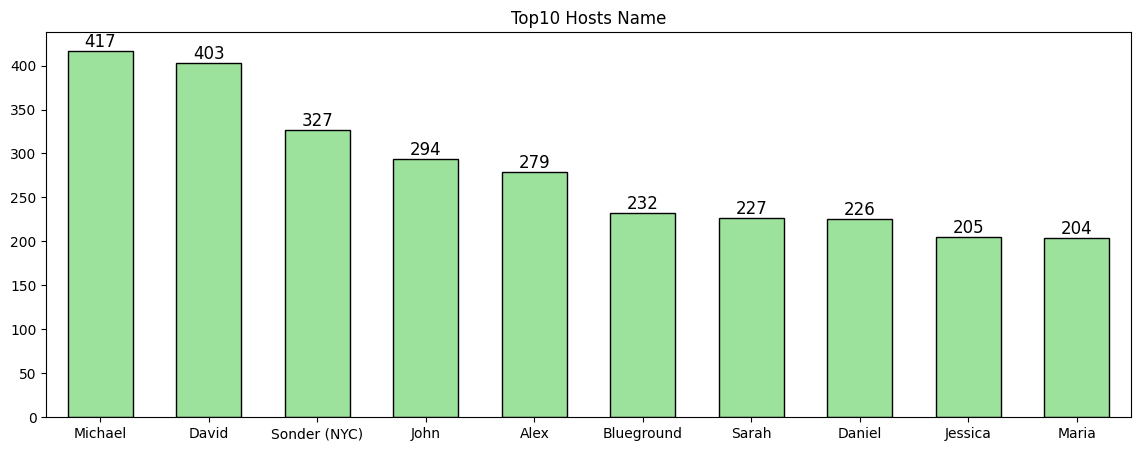

In [77]:
# Top 10 host_names
top_hosts = df['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(14, 5))
ax = sns.barplot(x=top_hosts.index, y=top_hosts.values, color='lightgreen', width=0.6, edgecolor='black')
plt.title('Top10 Hosts Name')
for bar in ax.containers:
    ax.bar_label(bar, size = 12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

### Distribution of Neighbourhood Groups

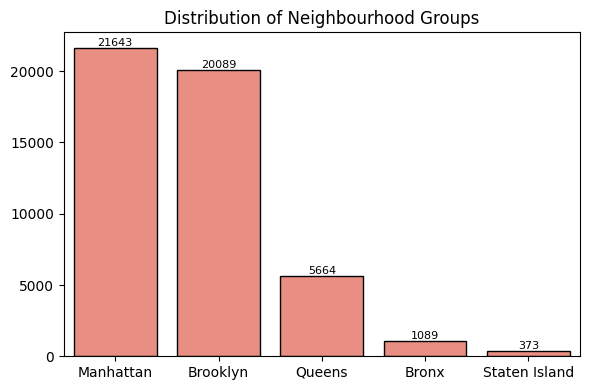

In [78]:
# Top 10 neighbourhood_groups
top_ngroup = df['neighbourhood_group'].value_counts().head(10)

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=top_ngroup.index, y=top_ngroup.values, color='salmon', edgecolor='black')
plt.title('Distribution of Neighbourhood Groups')
for bar in ax.containers:
    ax.bar_label(bar, size=8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Top10 Neighbourhoods

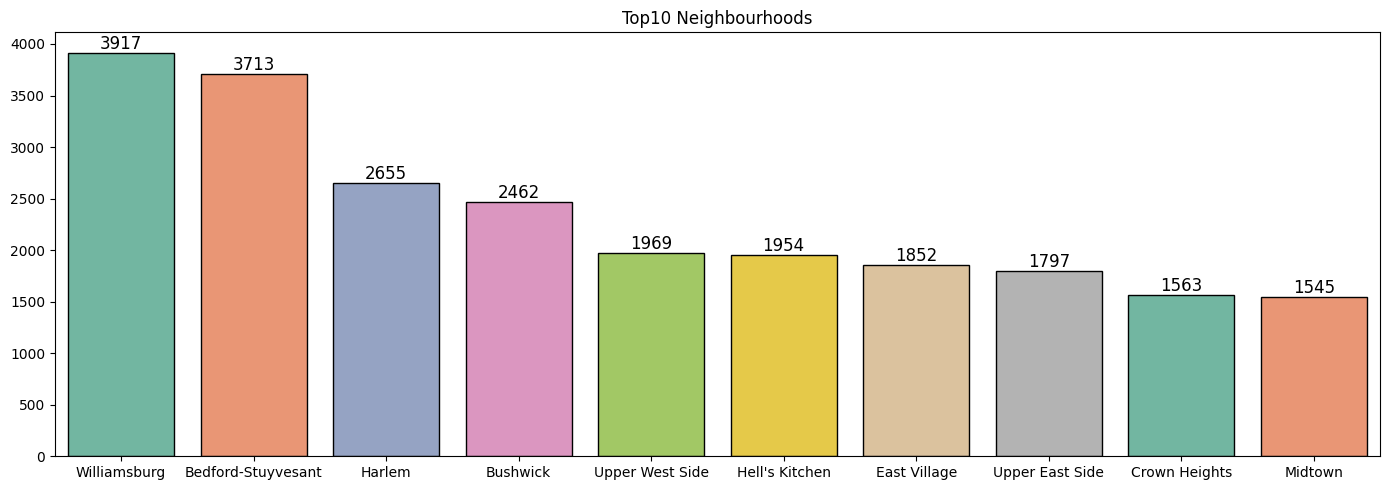

In [79]:
# Top 10 neighbourhoods
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

# Plot
plt.figure(figsize=(14, 5))
ax = sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='Set2', edgecolor='black')
plt.title('Top10 Neighbourhoods')
for bar in ax.containers:
    ax.bar_label(bar, size=12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Room Type Distribution

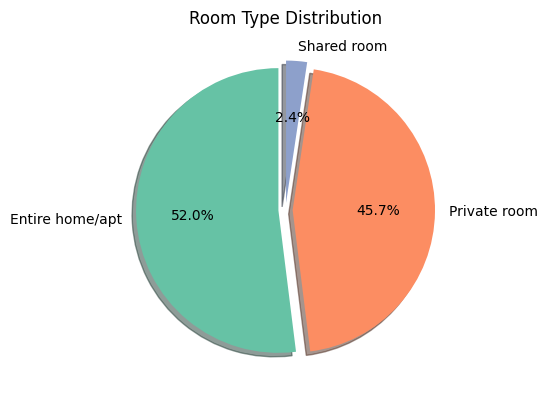

In [80]:
# Pie chart for room type distribution
df['room_type'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(5.5, 5.5), 
    shadow=True, 
    explode=[0.05]*df['room_type'].nunique(), 
    colors=sns.color_palette('Set2')
)
plt.title('Room Type Distribution')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

In [81]:
room_type_table = df['room_type'].value_counts().reset_index()
room_type_table

,room_type,count
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


## Bivariate Analysis

### Top 10 Hosts Name by Total Revenue

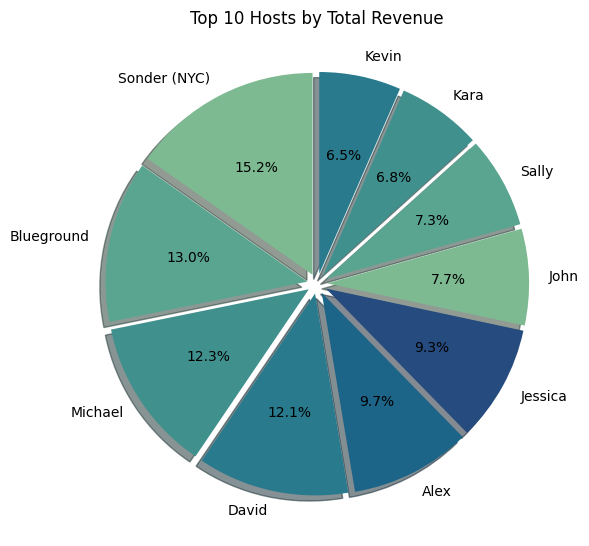

In [82]:
# Top 10 hosts by total price (revenue)
top_hosts_by_price = df.groupby('host_name')['price'].sum().sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_hosts_by_price, labels=top_hosts_by_price.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'), explode=[0.05]*10, shadow=True)
plt.title('Top 10 Hosts by Total Revenue')
plt.tight_layout()
plt.show()

In [83]:
top_hosts_by_price

host_name
Sonder (NYC)    82795
Blueground      70331
Michael         66895
David           65844
Alex            52563
Jessica         50697
John            41892
Sally           39789
Kara            36723
Kevin           35552
Name: price, dtype: int64

### Average Price per Room Type

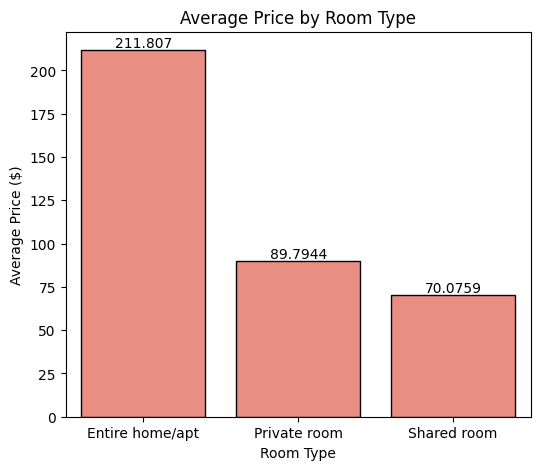

In [84]:
# Average Price per Room Type

plt.figure(figsize=(6, 5))
room_price_mean = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
# Plot
plot = sns.barplot(x=room_price_mean.index, y=room_price_mean.values, color='salmon', edgecolor='black')
plt.title('Average Price by Room Type')
for bar in plot.containers:
    plot.bar_label(bar, size=10)
plt.ylabel('Average Price ($)')
plt.xlabel('Room Type')
plt.show()

### Room Type Distribution across Neighbourhood Groups

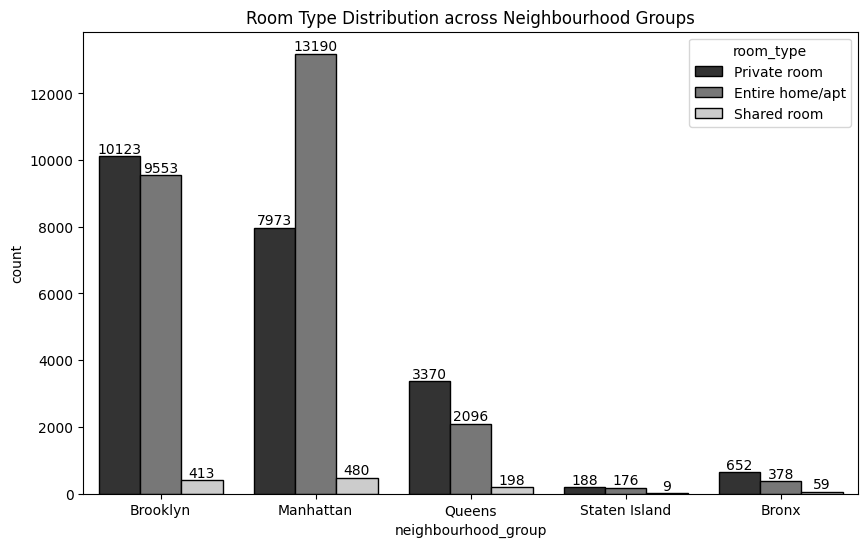

In [85]:
# Neighbourhood Group vs Room Type

plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette = ['#333333', '#777777', '#CCCCCC'], edgecolor='black')
plt.title('Room Type Distribution across Neighbourhood Groups')
for bar in plot.containers:
    plot.bar_label(bar, size=10)
plt.show()

### Listing Locations by Neighbourhood Group

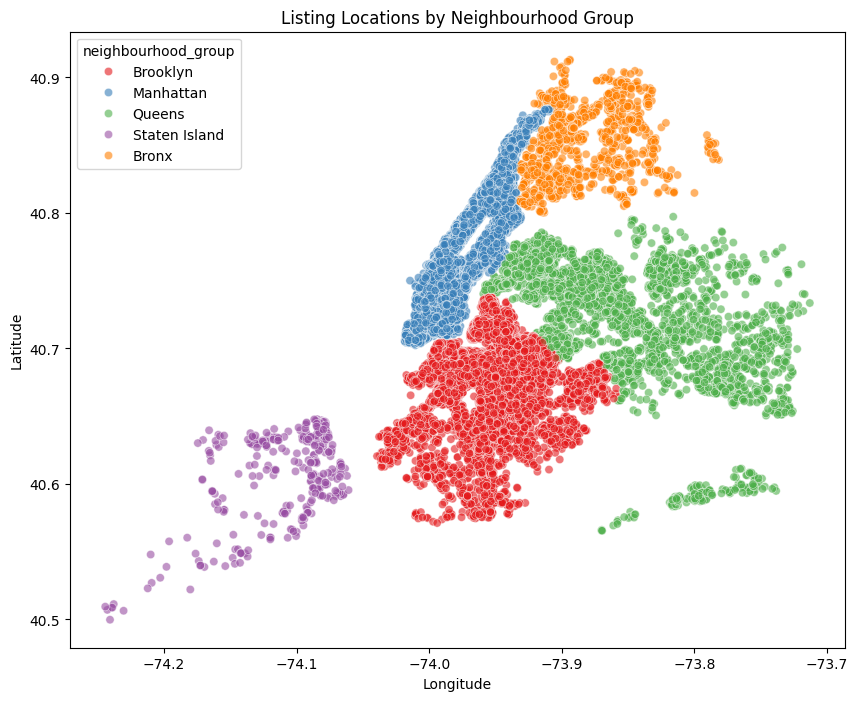

In [86]:
# Scatter Plot on Map(Latitude vs Longitude)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='Set1', alpha=0.6)
plt.title('Listing Locations by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Correlations

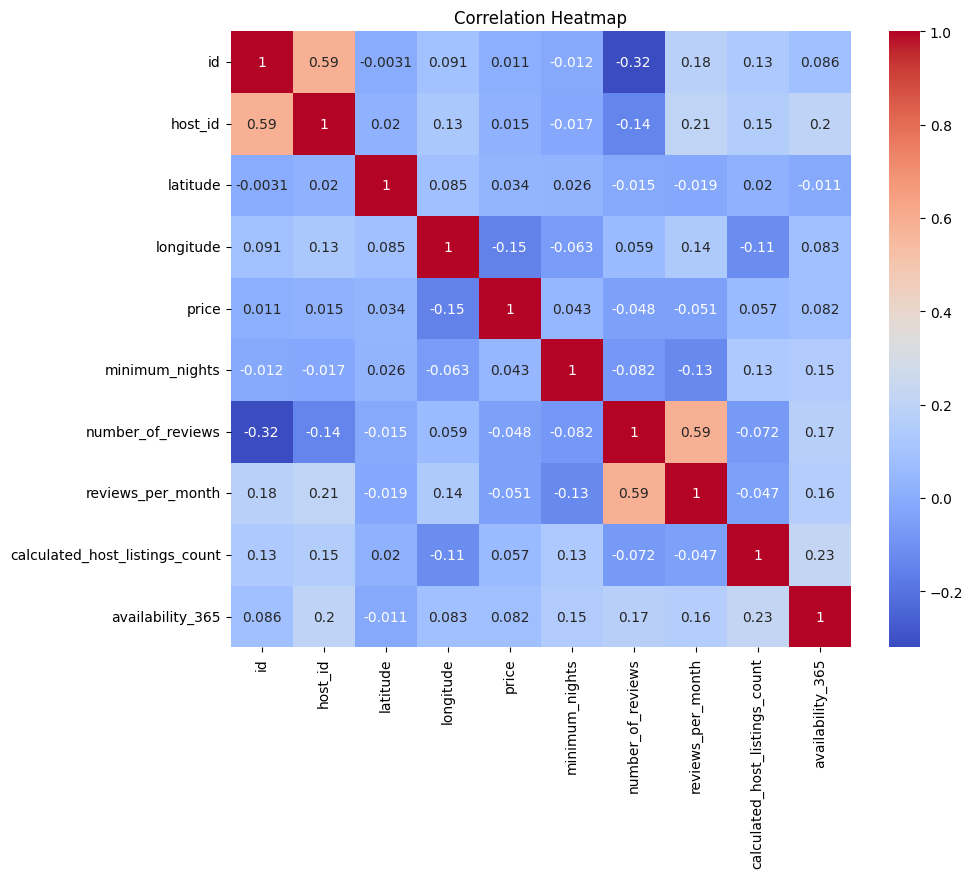

In [91]:
# # Correlation Heatmap for all Numeric Columns

# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Outliers Detection

In [88]:
# select only those columns which contains numerical values 
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

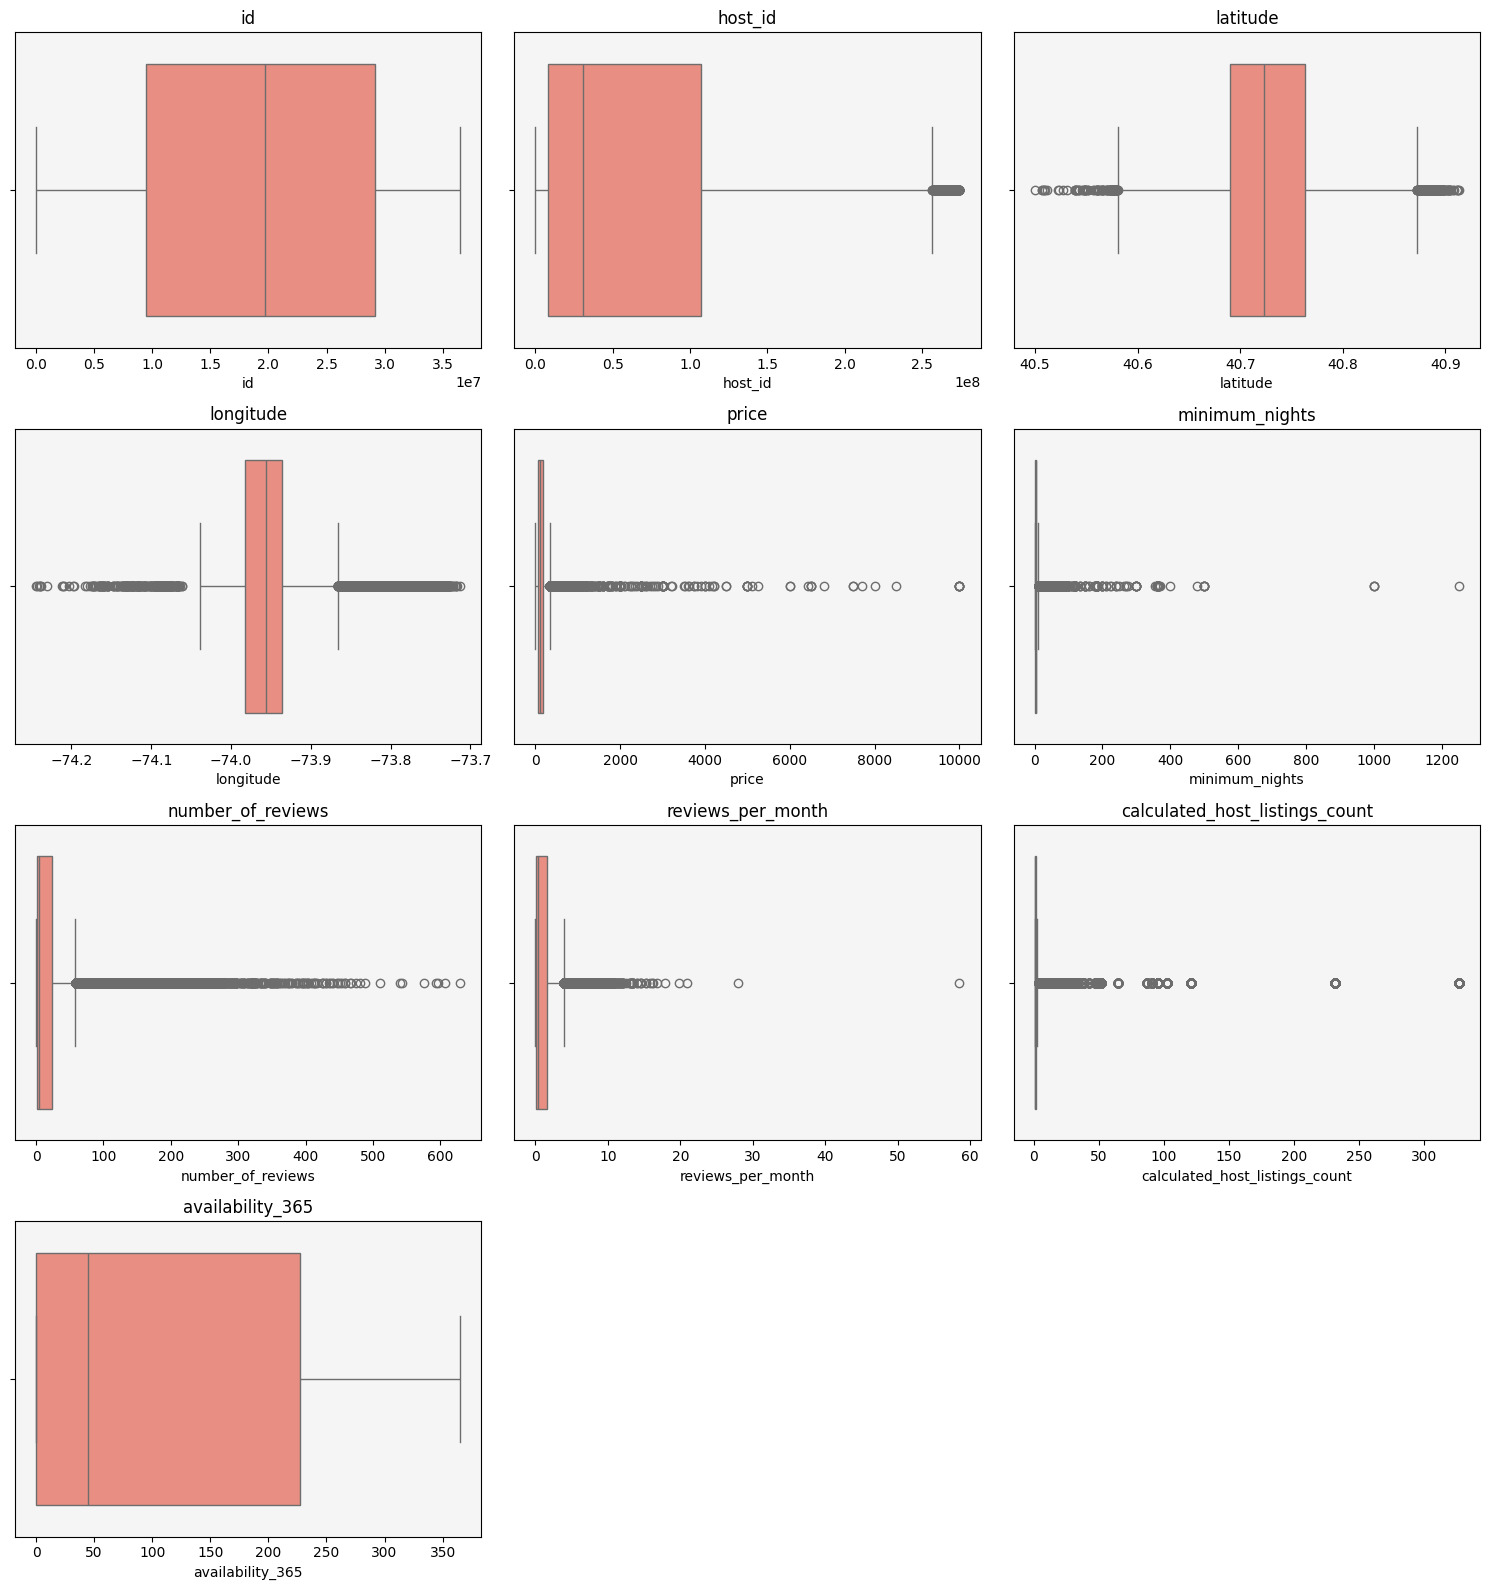

In [89]:
# outliers visualization using boxplot

# Plot settings
cols = 3  # number of plots per row
rows = (len(num_cols) + cols - 1) // cols
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=col, color='salmon')
    plt.title(col)
    plt.gca().set_facecolor('whitesmoke')  # for light background
plt.tight_layout()
plt.show()